# Installing Libraries

In [3]:
!pip install chemicalx
!pip install tdc
!pip install PyTDC
!pip install rdkit-pypi==2021.3.5.1
!pip install pubche|mpy
!pip install git+https://github.com/bp-kelley/descriptastorus and pip install pandas-flavor
!pip install torch
!pip install torchvision

/bin/bash: mpy: command not found
ERROR: Could not find a version that satisfies the requirement pubche (from versions: none)
ERROR: No matching distribution found for pubche
  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-1evxv3pe
  Running command git clone -q https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-1evxv3pe
ERROR: Could not find a version that satisfies the requirement and (from versions: none)
ERROR: No matching distribution found for and


# Importing Basic Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import chemicalx
import chemicalx.data
import rdkit
from tdc.chem_utils import MolConvert
import itertools
from matplotlib.colors import ColorConverter
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from PIL import Image
import os
import pandas as pd
import torch
import torchvision
from torchvision.io import read_image
import math

/Users/ramanghimire/opt/anaconda3/envs/anacondaX/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cpu')
device

device(type='cpu')

In [3]:
#Obtaining Dataset
from tdc.multi_pred import DDI
data = DDI(name = 'DrugBank')
split = data.get_split()

Found local copy...
Loading...
Done!


# Getting the data in a dataframe and understanding the data

In [4]:
split_items = split.items()
split_list = list(split_items)

#Train Set
print("Train Set")
train_key,train_value = split_list[0]
train_set = pd.DataFrame(train_value)
display(train_set)

#Validation Set
print("Validation Set")
validation_key,validation_value = split_list[1]
validation_set = pd.DataFrame(train_value)
display(validation_set)

# Test Set
print("Test Set")
test_key, test_value = split_list[1]
test_set = pd.DataFrame(train_value)
display(test_set)

Train Set


,Drug1_ID,Drug1,Drug2_ID,Drug2,Y
0,DB04571,CC1=CC2=CC3=C(OC(=O)C=C3C)C(C)=C2O1,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
1,DB09536,O=[Ti]=O,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
2,DB01600,CC(C(O)=O)C1=CC=C(S1)C(=O)C1=CC=CC=C1,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
3,DB09000,CC(CN(C)C)CN1C2=CC=CC=C2SC2=C1C=C(C=C2)C#N,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
4,DB11630,OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)...,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
...,...,...,...,...,...
134260,DB00437,OC1=NC=NC2=C1C=NN2,DB00524,CC1NC2=CC(Cl)=C(C=C2C(=O)N1C1=CC=CC=C1C)S(N)(=...,86
134261,DB00437,OC1=NC=NC2=C1C=NN2,DB01197,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,86
134262,DB00437,OC1=NC=NC2=C1C=NN2,DB00542,[H][C@@]1(CCC2=CC=CC=C2N(CC(O)=O)C1=O)N[C@@H](...,86
134263,DB00437,OC1=NC=NC2=C1C=NN2,DB00492,CCC(=O)O[C@@H](O[P@](=O)(CCCCC1=CC=CC=C1)CC(=O...,86


Validation Set


,Drug1_ID,Drug1,Drug2_ID,Drug2,Y
0,DB04571,CC1=CC2=CC3=C(OC(=O)C=C3C)C(C)=C2O1,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
1,DB09536,O=[Ti]=O,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
2,DB01600,CC(C(O)=O)C1=CC=C(S1)C(=O)C1=CC=CC=C1,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
3,DB09000,CC(CN(C)C)CN1C2=CC=CC=C2SC2=C1C=C(C=C2)C#N,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
4,DB11630,OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)...,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
...,...,...,...,...,...
134260,DB00437,OC1=NC=NC2=C1C=NN2,DB00524,CC1NC2=CC(Cl)=C(C=C2C(=O)N1C1=CC=CC=C1C)S(N)(=...,86
134261,DB00437,OC1=NC=NC2=C1C=NN2,DB01197,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,86
134262,DB00437,OC1=NC=NC2=C1C=NN2,DB00542,[H][C@@]1(CCC2=CC=CC=C2N(CC(O)=O)C1=O)N[C@@H](...,86
134263,DB00437,OC1=NC=NC2=C1C=NN2,DB00492,CCC(=O)O[C@@H](O[P@](=O)(CCCCC1=CC=CC=C1)CC(=O...,86


Test Set


,Drug1_ID,Drug1,Drug2_ID,Drug2,Y
0,DB04571,CC1=CC2=CC3=C(OC(=O)C=C3C)C(C)=C2O1,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
1,DB09536,O=[Ti]=O,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
2,DB01600,CC(C(O)=O)C1=CC=C(S1)C(=O)C1=CC=CC=C1,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
3,DB09000,CC(CN(C)C)CN1C2=CC=CC=C2SC2=C1C=C(C=C2)C#N,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
4,DB11630,OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)...,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
...,...,...,...,...,...
134260,DB00437,OC1=NC=NC2=C1C=NN2,DB00524,CC1NC2=CC(Cl)=C(C=C2C(=O)N1C1=CC=CC=C1C)S(N)(=...,86
134261,DB00437,OC1=NC=NC2=C1C=NN2,DB01197,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,86
134262,DB00437,OC1=NC=NC2=C1C=NN2,DB00542,[H][C@@]1(CCC2=CC=CC=C2N(CC(O)=O)C1=O)N[C@@H](...,86
134263,DB00437,OC1=NC=NC2=C1C=NN2,DB00492,CCC(=O)O[C@@H](O[P@](=O)(CCCCC1=CC=CC=C1)CC(=O...,86


In [5]:
#Getting All Unique IDs
all_drug1_ID_train = train_set['Drug1_ID'].unique()
all_drug1_ID_train = train_set['Drug2_ID'].unique()
all_drug1_ID_validation = validation_set['Drug1_ID'].unique()
all_drug2_ID_validation = validation_set['Drug2_ID'].unique()
all_drug1_ID_test = test_set['Drug1_ID'].unique()
all_drug2_ID_test = test_set['Drug2_ID'].unique()
all_drug_ID = np.array(list(itertools.chain(all_drug1_ID_train, all_drug1_ID_train, all_drug1_ID_validation,\
                                            all_drug2_ID_validation, all_drug1_ID_test, all_drug2_ID_test)))

#Getting All UNIQUE SMILES
all_drug1_SMILES_train = train_set['Drug1'].unique()
all_drug1_SM_SMILESILES_train = train_set['Drug2'].unique()
all_drug1_SMILES_validation = validation_set['Drug1'].unique()
all_drug2_SMILES_validation = validation_set['Drug2'].unique()
all_drug1_SMILES_test = test_set['Drug1'].unique()
all_drug2_SMILES_test = test_set['Drug2'].unique()
all_drug_SMILES = np.array(list(itertools.chain(all_drug1_SMILES_train, all_drug1_SMILES_train, all_drug1_SMILES_validation,\
                                                   all_drug2_SMILES_validation, all_drug1_SMILES_test,all_drug2_SMILES_test)))

all_drug_pair = {all_drug_ID[i]: all_drug_SMILES[i] for i in range(len(all_drug_ID))}

In [293]:
all_drug_pair

{'DB00460': 'NC1=NC(=O)N(C=C1F)[C@@H]1CS[C@H](CO)O1',
 'DB06148': 'NC[C@H]1CC[C@@H](CC1)C(O)=O',
 'DB00517': 'COC(=O)CCC1=C2NC(\\C=C3/N=C(/C=C4\\N\\C(=C/C5=N/C(=C\\2)/C(CCC(O)=O)=C5C)C(C=C)=C4C)C2=CC=C([C@@H](C(=O)OC)[C@@]32C)C(=O)OC)=C1C',
 'DB01090': 'CN1CCN2C(C1)C1=CC=CC=C1CC1=CC=CC=C21',
 'DB01168': '[Br-].CCCC(CCC)C(=O)O[C@H]1CC2CCC(C1)[N+]2(C)C',
 'DB00462': 'C[N+]1(CCCCC[N+]2(C)CCCC2)CCCC1',
 'DB00732': 'CNNCC1=CC=C(C=C1)C(=O)NC(C)C',
 'DB00332': '[Br-].[H][C@]12C[C@@H](C[C@@]([H])(C3OC13)[N+]2(C)C)OC(=O)[C@H](CO)C1=CC=CC=C1',
 'DB00670': '[O-]S(=O)(=O)C1=CC=CC=C1.[O-]S(=O)(=O)C1=CC=CC=C1.COC1=CC2=C(C=C1OC)C(CC1=CC(OC)=C(OC)C=C1)[N+](C)(CCC(=O)OCCCCCOC(=O)CC[N+]1(C)CCC3=C(C=C(OC)C(OC)=C3)C1CC1=CC(OC)=C(OC)C=C1)CC2',
 'DB01409': '[H][C@]12CC[C@]([H])(C[C@@H](C1)OC(=O)C(CO)C1=CC=CC=C1)[N+]2(C)C(C)C',
 'DB06702': 'CN1CCN(CC(=O)N2C3=CC=CC=C3C(=O)NC3=C2N=CC=C3)CC1',
 'DB00967': '[H][C@]12O[C@@]1([H])[C@]1([H])C[C@@]([H])(C[C@@]2([H])[N+]1(C)C)OC(=O)C(O)(C1=CC=CS1)C1=CC=CS1',
 'DB0021

In [7]:
# Getting meaning of labels
from tdc.utils import get_label_map
label_meaning = get_label_map(name = 'DrugBank', task = 'DDI')
label_meaning

{1: '#Drug1 may increase the photosensitizing activities of #Drug2.',
 2: '#Drug1 may increase the anticholinergic activities of #Drug2.',
 3: 'The bioavailability of #Drug2 can be decreased when combined with #Drug1.',
 4: 'The metabolism of #Drug2 can be increased when combined with #Drug1.',
 5: '#Drug1 may decrease the vasoconstricting activities of #Drug2.',
 6: '#Drug1 may increase the anticoagulant activities of #Drug2.',
 7: '#Drug1 may increase the ototoxic activities of #Drug2.',
 8: 'The therapeutic efficacy of #Drug2 can be increased when used in combination with #Drug1.',
 9: '#Drug1 may increase the hypoglycemic activities of #Drug2.',
 10: '#Drug1 may increase the antihypertensive activities of #Drug2.',
 11: 'The serum concentration of the active metabolites of #Drug2 can be reduced when #Drug2 is used in combination with #Drug1 resulting in a loss in efficacy.',
 12: '#Drug1 may decrease the anticoagulant activities of #Drug2.',
 13: 'The absorption of #Drug2 can be de

# Feature Extraction

In [8]:
all_drug_pair['DB00753']

'COC1=CC=C(CCN2CCC(CC2)NC2=NC3=CC=CC=C3N2CC2=CC=C(F)C=C2)C=C1'

In [9]:
to_tensor = torchvision.transforms.ToTensor()
i = 0
image_location  = []
for drug_id, smiles in all_drug_pair.items():
#     print(i, drug_id)
    mol = AllChem.MolFromSmiles(smiles)
    
    if not mol:
        continue
    #Getting it in 2D form
    AllChem.Compute2DCoords(mol)
    #Rendering the image in file
    img= Draw.MolToImage(mol, size=(300,300), highlightAtoms = None, highlightAtomRadii = None, \
                         highlightBondColors=None, highlightAtomColors=None)
    img.save("image_data/"+drug_id+".png")
    image_location.append([drug_id,"image_data/"+drug_id+".png"])

In [10]:
df_image_data = pd.DataFrame(np.array(image_location),columns = ['label','image_location'])
df_image_data

,label,image_location
0,DB00460,image_data/DB00460.png
1,DB06148,image_data/DB06148.png
2,DB00517,image_data/DB00517.png
3,DB01090,image_data/DB01090.png
4,DB01168,image_data/DB01168.png
...,...,...
1670,DB00142,image_data/DB00142.png
1671,DB01294,image_data/DB01294.png
1672,DB09322,image_data/DB09322.png
1673,DB11342,image_data/DB11342.png


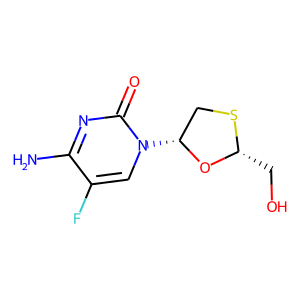

In [11]:
df_image_data['image_location'][0]
sample_image  = Image.open(df_image_data['image_location'][0])
sample_image

# Dataset

In [319]:
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

In [320]:
to_tensor = torchvision.transforms.ToTensor()
class OurImageDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        return to_tensor(Image.open(self.data.iloc[idx,1])), self.data.iloc[idx,0]

In [321]:
data = OurImageDataset(df_image_data)

# Data Loader

In [322]:
from torch.utils.data import DataLoader

dataloader = DataLoader(data, batch_size = 100, shuffle = True)

# Using Encoder layers to extract features from image

In [4]:
from torch import nn

/Users/ramanghimire/opt/anaconda3/envs/anacondaX/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [324]:
class DrugEncoderModel(nn.Module):
    
    def __init__(self):
        super(DrugEncoderModel, self).__init__()
#         #Defining CNN layers
        self.a = nn.BatchNorm2d(3)
        self.b = nn.Conv2d(in_channels = 3, out_channels=16, kernel_size=3, stride = 1, padding=0)
        self.c = nn.MaxPool2d(kernel_size= 2, return_indices = True)
        self.d = nn.BatchNorm2d(16)
        self.e = nn.Conv2d(in_channels=16, out_channels= 4, kernel_size=3, stride=1, padding=0)
        self.f = nn.MaxPool2d(kernel_size = 2, return_indices = True)
      # CNN Decoding layers
        self.a1 = nn.MaxUnpool2d(2)
        self.b1 = nn.ConvTranspose2d(in_channels = 4, out_channels=16, kernel_size=3, stride = 1, padding=0)
        self.c1 = nn.BatchNorm2d(16)
        self.d1 = nn.MaxUnpool2d(2)
        self.e1 = nn.ConvTranspose2d(in_channels=16, out_channels= 3, kernel_size= 3, stride=1, padding=0)
        self.f1 = nn.BatchNorm2d(3)

        print('Instance Created')
        
    def forward(self, X):
        #Encoding CNN
        load = self.a(X)
        load = self.b(load)
        load,indices1 = self.c(load)
#         load = self.d(load)
        load = self.e(load)
        print('0',load.shape)
        load, indices2 = self.f(load)
        print('1',load.shape)
        #Decoding CNN
      
        load = self.a1(load,indices2,output_size= (147,147))
        print('3',load.shape)
        load = self.b1(load)
        print('4',load.shape)
        load = self.c1(load)
        print('5',load.shape)
        load = self.d1(load,indices1, output_size = (298,298))
        print('6',load.shape)
        load = self.e1(load)
        print('7',load.shape)
        load = self.f1(load)
        print('8',load.shape)
        return load

In [325]:
model = DrugEncoderModel()

Instance Created


In [326]:
# Validation using MSE Loss function
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)
epochs = 10

In [327]:
for epoch in range(epochs):
    print(epoch)
    for i, (X,_) in enumerate(dataloader):
        X = X.to(device)        
        #Forward pass
        reconstruction = model(X)
        #Loss
        loss = loss_function(reconstruction, X)
        
        #Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        B = X 

0
0 torch.Size([100, 4, 147, 147])
1 torch.Size([100, 4, 73, 73])
3 torch.Size([100, 4, 147, 147])
4 torch.Size([100, 16, 149, 149])
5 torch.Size([100, 16, 149, 149])
6 torch.Size([100, 16, 298, 298])
7 torch.Size([100, 3, 300, 300])
8 torch.Size([100, 3, 300, 300])
0 torch.Size([100, 4, 147, 147])
1 torch.Size([100, 4, 73, 73])
3 torch.Size([100, 4, 147, 147])
4 torch.Size([100, 16, 149, 149])
5 torch.Size([100, 16, 149, 149])
6 torch.Size([100, 16, 298, 298])
7 torch.Size([100, 3, 300, 300])
8 torch.Size([100, 3, 300, 300])
0 torch.Size([100, 4, 147, 147])
1 torch.Size([100, 4, 73, 73])
3 torch.Size([100, 4, 147, 147])
4 torch.Size([100, 16, 149, 149])
5 torch.Size([100, 16, 149, 149])
6 torch.Size([100, 16, 298, 298])
7 torch.Size([100, 3, 300, 300])
8 torch.Size([100, 3, 300, 300])
0 torch.Size([100, 4, 147, 147])
1 torch.Size([100, 4, 73, 73])
3 torch.Size([100, 4, 147, 147])
4 torch.Size([100, 16, 149, 149])
5 torch.Size([100, 16, 149, 149])
6 torch.Size([100, 16, 298, 298])
7 to

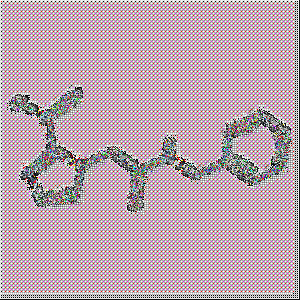

In [334]:
image_show = torchvision.transforms.ToPILImage()
norm = nn.BatchNorm2d(3)
c = norm(reconstruction)
image_show(c[1])

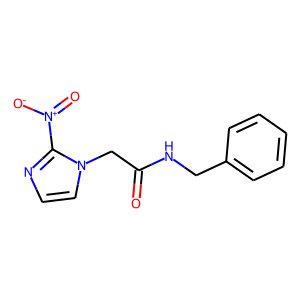

In [331]:
image_show(X[1])

In [335]:
from collections import OrderedDict
# Saving the Encoder  Model
encoder = OrderedDict()
a = model.state_dict()
for i in a.keys():
    try:
        int(i[1])
    except:
        encoder[i] = a[i]

In [336]:
torch.save(encoder,'encoder_model.pt')

In [337]:
encoder = torch.load('encoder_model.pt')

In [338]:
from torch import nn
# Building Encoder Model
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
#         #Defining CNN layers
        self.a = nn.BatchNorm2d(3)
        self.b = nn.Conv2d(in_channels = 3, out_channels=16, kernel_size=3, stride = 1, padding=0)
        self.c = nn.MaxPool2d(kernel_size= 2)
        self.d = nn.BatchNorm2d(16)
        self.e = nn.Conv2d(in_channels=16, out_channels= 4, kernel_size=3, stride=1, padding=0)
        self.f = nn.MaxPool2d(kernel_size = 2)

        print('Instance Created')
        
    def forward(self, X):
        #Encoding CNN
        load = self.a(X)
        load = self.b(load)
        load = self.c(load)
        load = self.d(load)
        load = self.e(load)
        print('0',load.shape)
        load = self.f(load)
        print('1',load.shape)
        return load

In [339]:
encoder_model = Model()
encoder_model.load_state_dict(encoder)
encoder_model.eval()

Instance Created


Model(
  (a): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (c): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (d): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (e): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1))
  (f): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

# Building dataset from Smiles

In [340]:
from torch.utils.data import DataLoader
data_loader = DataLoader(data, batch_size = 1)

In [341]:
lst = []
for i, (x,y) in enumerate(data_loader):
  lst.append([encoder_model(x).flatten().detach().numpy(),y])

0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.Size([1, 4, 73, 73])
0 torch.Size([1, 4, 147, 147])
1 torch.S

Saving the Encoded chemical Formula

In [342]:
a = np.array(lst)
df = pd.DataFrame(a)
df.to_csv('encoded_mole_formua.csv')

Loading df from the csv

In [343]:
df[0][0].shape

(21316,)

# Training Classifier Model with Trained Feature Extractor

In [2]:
# Building a Classifier Model
# Building Encoder Model
class Classifier(nn.Module):
    
    def __init__(self):
        super(Classifier, self).__init__()
        self.fnn = nn.Sequential(
            nn.Linear(42632,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,86),
        )

        print('Instance Created')
        
    def forward(self, X):
        return self.fnn(X)

NameError: name 'nn' is not defined

In [3]:
classifier = Classifier()

NameError: name 'Classifier' is not defined

In [346]:
train_set = split['train']
test_set = split['test']

In [347]:
train_set = train_set.drop(['Drug1','Drug2'],axis = 1)
test_set = test_set.drop(['Drug1','Drug2'],axis = 1)


In [348]:
chem_to_feature_map = {}
for i in df.iterrows():
    chem_to_feature_map[i[1][1][0]] = i[1][0]

In [349]:
test_set

,Drug1_ID,Drug2_ID,Y
0,DB00503,DB00169,47
1,DB04930,DB01589,73
2,DB00753,DB00285,47
3,DB01210,DB04896,73
4,DB00328,DB12332,47
...,...,...,...
38357,DB00655,DB00999,83
38358,DB00418,DB00091,4
38359,DB00312,DB00379,4
38360,DB01095,DB01200,73


In [350]:
keys = chem_to_feature_map.keys()
test_set = test_set[test_set['Drug1_ID'].isin(keys)]
test_set = test_set[test_set['Drug2_ID'].isin(keys)]
train_set = train_set[train_set['Drug1_ID'].isin(keys)]
train_set = train_set[train_set['Drug2_ID'].isin(keys)]

In [351]:
test_set['Y'] = test_set['Y'] - 1
train_set['Y'] = train_set['Y'] - 1

In [352]:
to_tensor = torchvision.transforms.ToTensor()
class Classifier_Data_Loader(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        f1 = np.array(chem_to_feature_map[self.data.iloc[idx,0]])
        f2 = np.array(chem_to_feature_map[self.data.iloc[idx,1]])
        f = torch.from_numpy(np.concatenate([f1,f2],axis = 0))
        l = self.data.iloc[idx,2]
        return f,l,f.shape

In [353]:
test_set.shape

(38219, 3)

In [354]:
data_classifier_train = Classifier_Data_Loader(train_set)
data_classifier_test = Classifier_Data_Loader(test_set)

data_train = DataLoader(data_classifier_train, batch_size = 1024, shuffle = True)
data_test = DataLoader(data_classifier_test, batch_size = 38362, shuffle = False)

In [355]:
next(iter(data_train))

[tensor([[-0.5307, -0.5307, -0.5307,  ...,  0.0400,  0.0400,  0.0400],
         [-0.5307, -0.5307, -0.5307,  ...,  0.0400,  0.0400,  0.0400],
         [-0.5307, -0.5307, -0.5307,  ...,  0.0400,  0.0400,  0.0400],
         ...,
         [-0.5307, -0.5307, -0.5307,  ...,  0.0400,  0.0400,  0.0400],
         [-0.5307, -0.5307, -0.5307,  ...,  0.0400,  0.0400,  0.0400],
         [-0.5307, -0.5307, -0.5307,  ...,  0.0400,  0.0400,  0.0400]]),
 tensor([48, 46, 46,  ...,  3, 72, 59]),
 [tensor([42632, 42632, 42632,  ..., 42632, 42632, 42632])]]

In [356]:
# Validation using CrossEntropy Loss function
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr = 1e-2)
epochs = 10

In [359]:
def accuracy(predicted, actual):
    accuracy = 0 
    for i in range(len(predicted)):
      x =  1 - (predicted[i] == actual[i]).sum().detach().numpy()/len(predicted)
      accuracy = accuracy + x
    return accuracy/len(predicted)

In [1]:
test_accuracy = []
train_accuracy = []
for epoch in range(epochs):
    for i, (X,y,_) in enumerate(data_train):
        optimizer.zero_grad()
        output = classifier(X)
        loss = loss_function(output, y)
        loss.backward()
        optimizer.step()
        train_accuracy.append(accuracy(output,y))


    for i,(X,y,_) in enumerate(data_test):
        optimizer.zero_grad()
        output_test = classifier(X)
        test_accuracy.append(accuracy(output_test,y))
    print('Epoch',epoch,'\t',test_accuracy[-1])



NameError: name 'epochs' is not defined

# References

1. @article{Huang2021tdc,
  title={Therapeutics Data Commons: Machine Learning Datasets and Tasks for Drug Discovery and Development},
  author={Huang, Kexin and Fu, Tianfan and Gao, Wenhao and Zhao, Yue and Roohani, Yusuf and Leskovec, Jure and Coley, 
          Connor W and Xiao, Cao and Sun, Jimeng and Zitnik, Marinka},
  journal={Proceedings of Neural Information Processing Systems, NeurIPS Datasets and Benchmarks},
  year={2021}
}
<br>

2. https://tdcommons.ai/functions/data_process/
3. https://tdcommons.ai/functions/data_split/